# **데이터프레임 결합**


## <b>1.환경준비</b>

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 가져오기

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")

sales1 = sales.loc[sales['Store_ID']==1]
sales2 = sales.loc[sales['Store_ID']==2]
sales5 = sales.loc[sales['Store_ID']==5]
sales11 = sales.loc[sales['Store_ID']==11]

products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [3]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [4]:
products.head() #LeadTime - 배송기간

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [5]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


## **2.결합1 : 붙이기 concat()**

* 데이터를 생성해 봅시다.

In [6]:
df1 = pd.DataFrame({'A':[10,25], 'B':[15,30]})
df2 = pd.DataFrame({'A':[20,30, 50], 'C':[35,30, 40]})
df2.drop([1], inplace = True)

display(df1)
display(df2)

,A,B
0,10,15
1,25,30


,A,C
0,20,35
2,50,40


### **(1) 세로로 합치기 : axis = 0**

* join = 'inner'

In [7]:
pd.concat([df1, df2], axis = 0, join = 'inner')

,A
0,10
1,25
0,20
2,50


* join = 'outer'

In [8]:
pd.concat([df1, df2], axis = 0, join = 'outer')

,A,B,C
0,10,15.0,NaN
1,25,30.0,NaN
0,20,NaN,35.0
2,50,NaN,40.0


### **(2) 가로로 합치기 : axis = 1**

* join = 'inner'

In [9]:
pd.concat([df1, df2], axis = 1, join = 'inner')

,A,B,A,C
0,10,15,20,35


* join = 'outer'

In [10]:
pd.concat([df1, df2], axis = 1, join = 'outer')

,A,B,A,C
0,10.0,15.0,20.0,35.0
1,25.0,30.0,NaN,NaN
2,NaN,NaN,50.0,40.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] sales1,2,5,11 데이터프레임을 하나로 합칩시다. 어떻게 합치는게 좋을까요?

In [45]:
temp = pd.concat([sales1, sales2, sales5, sales11], axis=0)
display(temp)

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.000,3
1,5,2013-01-01,1,0.000,5
2,7,2013-01-01,1,0.000,7
3,8,2013-01-01,1,0.000,8
4,10,2013-01-01,1,0.000,10
...,...,...,...,...,...
24340,53548,2013-01-31,11,10.000,22
24341,53550,2013-01-31,11,641.507,24
24342,53553,2013-01-31,11,0.000,27
24343,53555,2013-01-31,11,27.000,29


[문2] (조금 어려운 문제!)  
일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.concat 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.concat 으로 가로로 합치기



In [51]:
temp.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum()

,Date,Store_ID,Qty
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,5,0.000000
3,2013-01-01,11,0.000000
4,2013-01-02,1,6760.782000
...,...,...,...
119,2013-01-30,11,7744.136020
120,2013-01-31,1,4341.563000
121,2013-01-31,2,4862.804996
122,2013-01-31,5,5230.479000


In [52]:
temp1 = sales1.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Qty' : 'Qty_1'}, axis=1)
temp2 = sales2.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Qty' : 'Qty_2'}, axis=1)
temp5 = sales5.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Qty' : 'Qty_5'}, axis=1)
temp11 = sales11.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Qty' : 'Qty_11'}, axis=1)

pd.concat([temp1, temp2, temp5, temp11], axis=1)

,Date,Store_ID,Qty_1,Date,Store_ID,Qty_2,Date,Store_ID,Qty_5,Date,Store_ID,Qty_11
0,2013-01-01,1,0.000000,2013-01-01,2,0.000000,2013-01-01,5,0.000000,2013-01-01,11,0.000000
1,2013-01-02,1,6760.782000,2013-01-02,2,9221.338001,2013-01-02,5,9404.229020,2013-01-02,11,16593.312000
2,2013-01-03,1,5348.384001,2013-01-03,2,6830.089000,2013-01-03,5,6932.685000,2013-01-03,11,11032.676040
3,2013-01-04,1,5390.445001,2013-01-04,2,6742.984000,2013-01-04,5,6567.938000,2013-01-04,11,10962.687002
4,2013-01-05,1,5787.839000,2013-01-05,2,8583.055000,2013-01-05,5,7276.800000,2013-01-05,11,13315.896000
5,2013-01-06,1,2007.194000,2013-01-06,2,9317.139000,2013-01-06,5,9578.077030,2013-01-06,11,14165.615050
6,2013-01-07,1,5639.396000,2013-01-07,2,6047.629000,2013-01-07,5,5729.203000,2013-01-07,11,9946.420000
7,2013-01-08,1,5131.128000,2013-01-08,2,5545.928020,2013-01-08,5,5716.248000,2013-01-08,11,9258.956000
8,2013-01-09,1,6198.154980,2013-01-09,2,6061.471020,2013-01-09,5,5352.507000,2013-01-09,11,8644.922000
9,2013-01-10,1,4309.750000,2013-01-10,2,5070.431000,2013-01-10,5,5319.121020,2013-01-10,11,8470.169000


In [53]:
agg_df_list = []
for i, df in enumerate([sales1, sales2, sales5, sales11]):
    agg_df = df.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename( {'Qty' : f'Qty_{i}'}, axis=1)
    agg_df_list.append(agg_df)

pd.concat(agg_df_list, axis=1, join='inner')

,Date,Store_ID,Qty_0,Date,Store_ID,Qty_1,Date,Store_ID,Qty_2,Date,Store_ID,Qty_3
0,2013-01-01,1,0.000000,2013-01-01,2,0.000000,2013-01-01,5,0.000000,2013-01-01,11,0.000000
1,2013-01-02,1,6760.782000,2013-01-02,2,9221.338001,2013-01-02,5,9404.229020,2013-01-02,11,16593.312000
2,2013-01-03,1,5348.384001,2013-01-03,2,6830.089000,2013-01-03,5,6932.685000,2013-01-03,11,11032.676040
3,2013-01-04,1,5390.445001,2013-01-04,2,6742.984000,2013-01-04,5,6567.938000,2013-01-04,11,10962.687002
4,2013-01-05,1,5787.839000,2013-01-05,2,8583.055000,2013-01-05,5,7276.800000,2013-01-05,11,13315.896000
5,2013-01-06,1,2007.194000,2013-01-06,2,9317.139000,2013-01-06,5,9578.077030,2013-01-06,11,14165.615050
6,2013-01-07,1,5639.396000,2013-01-07,2,6047.629000,2013-01-07,5,5729.203000,2013-01-07,11,9946.420000
7,2013-01-08,1,5131.128000,2013-01-08,2,5545.928020,2013-01-08,5,5716.248000,2013-01-08,11,9258.956000
8,2013-01-09,1,6198.154980,2013-01-09,2,6061.471020,2013-01-09,5,5352.507000,2013-01-09,11,8644.922000
9,2013-01-10,1,4309.750000,2013-01-10,2,5070.431000,2013-01-10,5,5319.121020,2013-01-10,11,8470.169000


## **3.결합 ① : 조인 join(merge)**

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [54]:
df1 = pd.DataFrame({'A':[1,2], 'B':[15,30], 'C':[20, 25]})
df2 = pd.DataFrame({'A':[2,3], 'D':[20, 35]})

display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


### **(1) inner merge**

In [55]:
pd.merge(df1, df2, how = 'inner', on = 'A')

,A,B,C,D
0,2,30,25,20


In [56]:
pd.merge(df1, df2, how = 'inner')

,A,B,C,D
0,2,30,25,20


In [59]:
pd.merge(df1, df2)

,A,B,C,D
0,2,30,25,20


### **(2) left merge**

In [57]:
pd.merge(df1, df2, how = 'left')

,A,B,C,D
0,1,15,20,NaN
1,2,30,25,20.0


### **(3) right merge**

In [58]:
pd.merge(df1, df2, how = 'right')

,A,B,C,D
0,2,30.0,25.0,20
1,3,NaN,NaN,35


* Merge를 여러번 하는 방법

https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.merge 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.merge 으로 결합하기



In [62]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [74]:
s1 = sales1.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum()[['Date', 'Qty']].rename({'Qty': 'Qty_1'}, axis=1)
s2 = sales2.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum()[['Date', 'Qty']].rename({'Qty': 'Qty_2'}, axis=1)
s5 = sales5.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum()[['Date', 'Qty']].rename({'Qty': 'Qty_5'}, axis=1)
s11 = sales11.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum()[['Date', 'Qty']].rename({'Qty': 'Qty_11'}, axis=1)

x1 = pd.merge(s1, s2, how='left', on='Date')
x2 = pd.merge(x1, s5, how='left', on='Date')

total = pd.merge(x2, s11, how='left', on='Date')
total.head(5)

,Date,Qty_1,Qty_2,Qty_5,Qty_11
0,2013-01-01,0.000000,0.000000,0.00000,0.000000
1,2013-01-02,6760.782000,9221.338001,9404.22902,16593.312000
2,2013-01-03,5348.384001,6830.089000,6932.68500,11032.676040
3,2013-01-04,5390.445001,6742.984000,6567.93800,10962.687002
4,2013-01-05,5787.839000,8583.055000,7276.80000,13315.896000


In [73]:
s1 = sales1.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Store_ID' : 'Store_1','Qty': f'Qty_1'}, axis=1)
s2 = sales2.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Store_ID' : 'Store_2','Qty': f'Qty_2'}, axis=1)
s5 = sales5.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Store_ID' : 'Store_5','Qty': f'Qty_5'}, axis=1)
s11 = sales11.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum().rename({'Store_ID' : 'Store_11','Qty': f'Qty_11'}, axis=1)

x1 = pd.merge(s1, s2, how='left', on='Date')
x2 = pd.merge(x1, s5, how='left', on='Date')
total = pd.merge(x2, s11, how='left', on='Date')
total.head(5)

,Date,Store_1,Qty_1,Store_2,Qty_2,Store_5,Qty_5,Store_11,Qty_11
0,2013-01-01,1,0.000000,2,0.000000,5,0.00000,11,0.000000
1,2013-01-02,1,6760.782000,2,9221.338001,5,9404.22902,11,16593.312000
2,2013-01-03,1,5348.384001,2,6830.089000,5,6932.68500,11,11032.676040
3,2013-01-04,1,5390.445001,2,6742.984000,5,6567.93800,11,10962.687002
4,2013-01-05,1,5787.839000,2,8583.055000,5,7276.80000,11,13315.896000


[문2] 매장1에 대해서, 일별, 카테고리별 판매량 합계를 구해 봅시다. 



In [91]:
tmp = pd.merge(sales1, products, how='left', on='Product_ID')
tmp.groupby(['Date', 'Category'], as_index=False)['Qty'].sum()

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


[문3] 도시별, 총판매량 합계를 구하시오.  



In [88]:
temp = pd.merge(sales, stores, how='left', on='Store_ID')
temp.groupby(['City'], as_index=False)['Qty'].sum()

,City,Qty
0,Albany,1.119409e+05
1,Annapolis,2.255278e+05
2,Asheville,6.644511e+04
3,Atlanta,3.845901e+05
4,Bloomington,1.315413e+05
5,Boston,1.138053e+05
6,Charlotte,1.454050e+05
7,Columbus,1.872153e+05
8,Harrisburg,1.421269e+05
9,Indianapolis,1.488044e+05


### **(4) pivot**
* pivot : 결합은 아니지만, 집계 후 데이터프레임 구조를 변형해서 조회하는데 종종 사용 됩니다.

* 단계
    * 1) groupby
    * 2) pivot

In [94]:
# 1) 매장1의 일별 카테고리별 판매량을 집계
temp = pd.merge(sales1, products)
temp2 = temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()
temp2

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


In [99]:
# 2) pivot
temp3 = temp2.pivot(index='Category', columns = 'Date' , values = 'Qty')
temp3

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
Category,,,,,,,,,,,,,,,,,,,,,
Drink,0.0,1158.000,985.000000,1055.000000,1319.000,407.000,1267.000,1115.000,1290.00000,914.000,...,1114.000,1152.000,924.000,1213.000,1132.000,417.000,830.000,999.000,1140.000,971.000
Food,0.0,1227.652,913.699000,790.366000,901.057,416.912,852.676,829.851,967.58200,775.515,...,780.201,1025.047,791.388,836.856,880.019,416.783,821.064,668.154,900.092,751.766
Grocery,0.0,3305.130,2613.685001,2711.079001,2746.782,926.282,2689.720,2356.277,3023.57298,1933.235,...,2242.216,2824.296,2221.805,2393.208,2257.907,1162.207,2208.364,2001.047,2662.485,1907.797
Household Goods,0.0,1070.000,836.000000,834.000000,821.000,257.000,830.000,830.000,917.00000,687.000,...,786.000,769.000,622.000,701.000,551.000,247.000,625.000,617.000,932.000,711.000


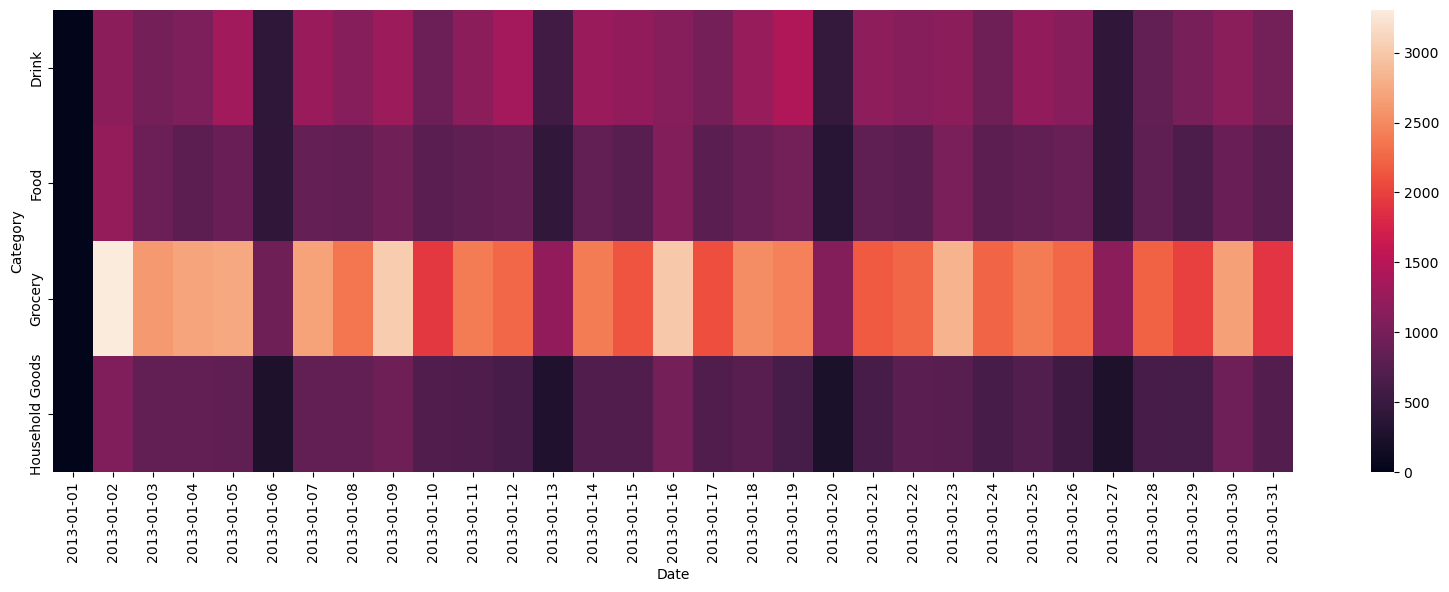

In [100]:
# sns.heatmap으로 시각화 할 수도 있습니다!

plt.figure(figsize = (20, 6))
sns.heatmap(temp3)
plt.show()

## **4.복습문제**

In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

1) sales에 금액(Amt) 변수를 추가하시오.
* Amt = Qty * Price

In [3]:
products.head()

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [4]:
new_sales = pd.merge(sales, products, how='left', on = 'Product_ID')
new_sales['Amt'] = new_sales['Qty'] * new_sales['Price']

new_sales.head(5)

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price,Amt
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8,0.0
1,5,2013-01-01,1,0.0,5,FB001,BAKERY,Food,2,6,0.0
2,7,2013-01-01,1,0.0,7,HC001,Cleaning,Household Goods,2,15,0.0
3,8,2013-01-01,1,0.0,8,FM001,Milk,Food,2,4,0.0
4,10,2013-01-01,1,0.0,10,GE001,EGGS,Grocery,2,5,0.0


2) City별 매출액

In [5]:
sales_store = pd.merge(new_sales, stores, how = 'left', on = 'Store_ID')
sales_store.groupby(['City'], as_index=False)['Amt'].sum()

,City,Amt
0,Albany,9.618918e+05
1,Annapolis,1.926923e+06
2,Asheville,5.699986e+05
3,Atlanta,3.374833e+06
4,Bloomington,1.154652e+06
5,Boston,9.879414e+05
6,Charlotte,1.229219e+06
7,Columbus,1.650586e+06
8,Harrisburg,1.345873e+06
9,Indianapolis,1.256235e+06


3) City별 카테고리별 매출액

In [6]:
sales_store.groupby(['City', 'Category'], as_index=False)['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


4) 매출액이 가장 높은 주(state) top 3

In [7]:
sales_store.groupby(['State'], as_index=False)['Amt'].sum().sort_values(['Amt'], ascending=False).head(3)

,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06


추가 문제

* 2013년 1월 세째 주 각 도시별 subCategory별 금액 비교
    1. 2013년 1월 세째 주
        * sales['Date']를 날짜 타입으로 변환
        * week 추가
        * sales에서 week가 3인 데이터 뽑기
    2. 각 도시별 subCategory별
        * 1의 결과에서...
        * stores와 inner merge
        * products와 inner merge
    3. 도시별 subCategory별 금액
        * Qty * Price로 Amt 추가
        * groupby
    4. 좀더 보기 좋게! pivot + heatmap
        * pivot
        * heatmap

In [10]:
sales_store['Date'] = pd.to_datetime(sales_store['Date'])
sales_store['week'] = sales_store['Date'].dt.isocalendar().week
sales_store.head(3)

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price,Amt,City,State,Store_Type,week
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8,0.0,Saint Paul,Minnesota,4,1
1,5,2013-01-01,1,0.0,5,FB001,BAKERY,Food,2,6,0.0,Saint Paul,Minnesota,4,1
2,7,2013-01-01,1,0.0,7,HC001,Cleaning,Household Goods,2,15,0.0,Saint Paul,Minnesota,4,1


In [13]:
week3 = sales_store.loc[(sales_store['Date'].dt.year == 2013) & (sales_store['week'] == 3)]
week3.head(3)

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price,Amt,City,State,Store_Type,week
10530,23169,2013-01-14,1,1178.000,3,DB001,Beverage,Drink,2,8,9424.000,Saint Paul,Minnesota,4,3
10531,23171,2013-01-14,1,281.286,5,FB001,BAKERY,Food,2,6,1687.716,Saint Paul,Minnesota,4,3
10532,23173,2013-01-14,1,692.000,7,HC001,Cleaning,Household Goods,2,15,10380.000,Saint Paul,Minnesota,4,3


In [16]:
temp5 = week3.groupby(['City', 'SubCategory'], as_index=False)['Amt'].sum()
temp_pv = pd.pivot(temp5, index='City', columns = 'SubCategory', values='Amt')
temp_pv

SubCategory,Agricultural products,Alcohol,BAKERY,Beverage,Cleaning,EGGS,Frozen,Gardening Tools,Home Appliances,Kitchen,Meats,Milk,Prepared,Seafood
City,,,,,,,,,,,,,,
Albany,67224.0,6336.0,7530.00000,45360.0,61365.0,1790.0,2066.453000,0.0,0.0,0.0,1.328659e+04,1644.0,4608.000000,68.000000
Annapolis,134160.0,3672.0,17250.00000,86632.0,126525.0,2045.0,4537.717000,0.0,0.0,0.0,3.601402e+04,6044.0,4878.000000,1326.000000
Asheville,45108.0,4848.0,4098.00000,24192.0,40245.0,1160.0,1421.000000,0.0,0.0,0.0,1.177250e+04,1896.0,1854.000000,136.000000
Atlanta,229254.0,10200.0,49734.27618,98968.0,215130.0,8795.0,36590.779290,2350.0,0.0,0.0,4.670804e+04,19572.0,27645.804270,6039.488017
Bloomington,90810.0,2868.0,9234.00000,28768.0,90750.0,3325.0,4971.063971,0.0,0.0,0.0,2.398624e+04,3772.0,3906.000000,578.000000
Boston,68148.0,2220.0,7842.00000,47720.0,68655.0,1115.0,2834.807971,0.0,0.0,0.0,1.520538e+04,1780.0,3402.000000,1700.000000
Charlotte,81708.0,6252.0,17148.71418,53464.0,64050.0,6405.0,10270.466000,1000.0,0.0,0.0,2.202440e+04,10428.0,11037.006144,5877.070000
Columbus,118752.0,5364.0,20010.03000,41656.0,98655.0,4220.0,24646.810000,900.0,0.0,0.0,2.189503e+04,12840.0,23483.699460,5622.784000
Harrisburg,88944.0,1068.0,9972.00000,25056.0,103230.0,1105.0,3625.928000,0.0,0.0,0.0,5.127511e+04,3532.0,4626.000000,1802.000000


<Axes: xlabel='SubCategory', ylabel='City'>

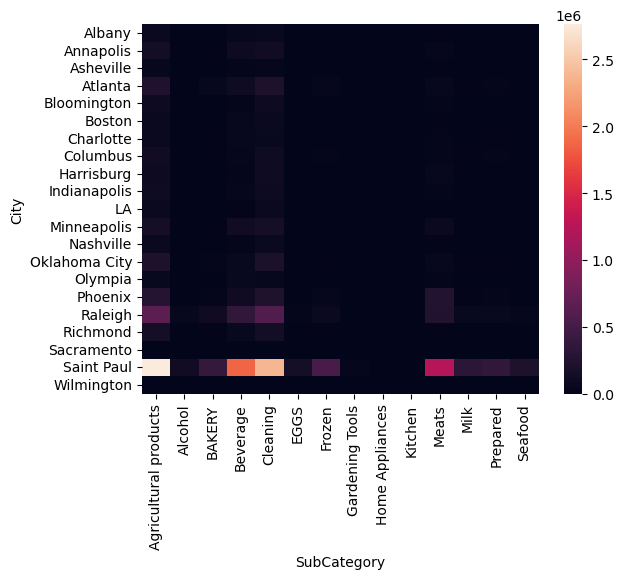

In [17]:
import seaborn as sns
sns.heatmap(temp_pv)